In [1]:
########################################## Import library and model enviroment ############################################

from docplex.mp.model import Model
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx    

mdl=Model('modelo')

In [2]:
def graphic(x,d,N):
    edges = []
    for i in N:
        for j in N:
            if i != j and x[i,j] > 0.5: # Este es un valor de tolerancia, puede ajustarse según la necesidad
                edges.append((i, j, d[i-1][j-1]))
    # Crear un grafo de NetworkX
    G = nx.Graph()
    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    plt.figure(figsize=(10, 10))
    # Dibujar el grafo
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    # Mostrar el gráfico
    plt.show()

In [3]:
#Create a Random Matrix
C = np.random.randint(1, 100, size=(50, 50))
# A_i,i = 0
np.fill_diagonal(C, 0)

In [4]:
#Parameters
n=len(C)

In [5]:
#Sets
N=[i+1 for i in range(n)]

In [6]:
#Index
Ind={(i,j) for i in N for j in N if i!=j}#x
Ind2={(i,j) for i in N for j in N if i!=j}#g

$ Variables $

$x_{ij}={\begin{cases}1&{\text{the path goes from city }}i{\text{ to city }}j\\0&{\text{otherwise}}\end{cases}}$

$g_{ij}= \text{The number of arcs on the path from vertex 1 to arc (i, j) in the optimal tour} $ 


In [7]:
#Variables
x=mdl.binary_var_dict(Ind, name='x')
g=mdl.continuous_var_dict(Ind2, name='g')

$\sum_{i=1}^{N} \sum_{j\neq i,j=1}^{N} c_{ij}x_{ij}$


$ \sum_{i=1,i \neq j}^{N} x_{ij}= 1 ~\small{for}~ j=1,...,N   $ 

$ \sum_{j=1,j \neq i}^{N} x_{ij}= 1 ~\small{for}~ i=1,...,N   $

$\sum_{j=1}^n g_{ij} - \sum_{j=2}^n g_{ji} = 1, \quad i = 2,\ldots,n,$

$ 0 \leq g_{ij} \leq ( n - 1 ) x_{ij}, \quad i = 2,\ldots,n, \, j = 1,\ldots,n, $


$ x_{ij} \in \{0,1\}, \quad i, j = 1,\ldots,n, $

$ g_{ij} \geq 0  , \quad i, j = 1,\ldots,n, $

In [14]:
mdl.minimize(mdl.sum(x[i,j]*C[i-1][j-1] for i in N for j in N if i!=j))

In [15]:
for i in N:
    mdl.add_constraint(mdl.sum(x[i,j] for j in N if i!=j)==1)

In [16]:
for j in N:
    mdl.add_constraint(mdl.sum(x[i,j] for i in N if i!=j)==1)

In [17]:
for i in range(2,n+1):
    mdl.add_constraint(mdl.sum(g[i,j] for j in N if i!=j)-mdl.sum(g[j,i] for j in range(2,n+1) if i!=j)==1)

In [18]:
for i in N:
    for j in N:
        if i!=j:
            mdl.add_constraint(g[i,j]<=(n-1)*x[i,j])

Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125
Tried aggregator 1 time.
MIP Presolve eliminated 49 rows and 49 columns.
Reduced MIP has 2550 rows, 4851 columns, and 14455 nonzeros.
Reduced MIP has 2450 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (7.41 ticks)
Found incumbent of value 2761.000000 after 0.03 sec. (21.92 ticks)
Probing time = 0.03 sec. (4.89 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 2550 rows, 4851 columns, and 14455 nonzeros.
Reduced MIP has 2450 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (9.40 ticks)
Probing time = 0.02 sec. (4.41 ticks)
Clique table members: 100.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.08 sec. (132.84 ticks)

        

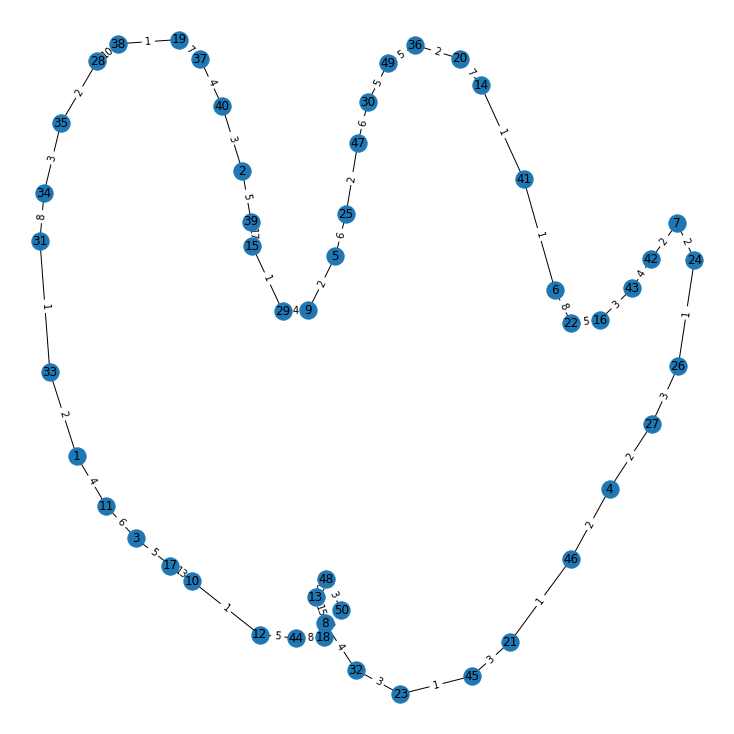

In [13]:
solution = mdl.solve(log_output=True)
print(mdl.export_to_string()) 
x=solution.get_value_dict(x, keep_zeros=True, precision=1)
graphic(x,C,N)

$Literature$

Gavish B, Graves S (1978) The travelling salesman problem and related problems, working Paper GR-078-78. Operations Research Center, Massachusetts Institute of Technology, Cambridge
